# Data Preparation

In [4]:
import nltk
nltk.download("gutenberg")
nltk.download("punkt")
nltk.download("stopwords")
nltk.download('wordnet')

from nltk.corpus import gutenberg
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import pandas as pd
import re
import random
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
import gensim.corpora as corpora
from gensim.models.ldamulticore import LdaMulticore
from gensim.corpora.dictionary import Dictionary
#!pip install pyldavis
!pip install pyLDAvis==2.1.2
import pyLDAvis.gensim



[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
     |████████████████████████████████| 1.6MB 4.0MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97738 sha256=8f1b5b687ee15fc1f3f2c1e85fcce53fb255535f4966b1e233913ba7aa4a85cb
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [5]:
!wget -O s1.txt --no-check-certificate "https://docs.google.com/uc?export=download&id=1pDXlxGdIRdzikPFh6W8E9GGnk12vHaYE"
!wget -O s2.txt --no-check-certificate "https://docs.google.com/uc?export=download&id=1jX6-qbMH1Tpd5PJ9eMt-KuLeqyLotBr_"
!wget -O s3.txt --no-check-certificate "https://docs.google.com/uc?export=download&id=1ATqMYJ8JUm4wOpKuU3rT8FUljjUdAOb9"
!wget -O s4.txt --no-check-certificate "https://docs.google.com/uc?export=download&id=1GuEr_h3fwGZQpA5wMqwWDpxm2sRyIEau"
!wget -O s5.txt --no-check-certificate "https://docs.google.com/uc?export=download&id=1n9hC5o5teuMBq9n2jN63NxnnYY83fjHJ"

--2021-06-20 10:11:19--  https://docs.google.com/uc?export=download&id=1pDXlxGdIRdzikPFh6W8E9GGnk12vHaYE
Resolving docs.google.com (docs.google.com)... 172.217.203.101, 172.217.203.100, 172.217.203.113, ...
Connecting to docs.google.com (docs.google.com)|172.217.203.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0c-ag-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/4h4kniqplub6f4q6bcqlu02ht0brusq4/1624183875000/16076143471442254290/*/1pDXlxGdIRdzikPFh6W8E9GGnk12vHaYE?e=download [following]
--2021-06-20 10:11:19--  https://doc-0c-ag-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/4h4kniqplub6f4q6bcqlu02ht0brusq4/1624183875000/16076143471442254290/*/1pDXlxGdIRdzikPFh6W8E9GGnk12vHaYE?e=download
Resolving doc-0c-ag-docs.googleusercontent.com (doc-0c-ag-docs.googleusercontent.com)... 108.177.11.132, 2607:f8b0:400c:c01::84
Connecting to doc-0c-ag-docs.googleusercontent.com (doc-0c-

In [6]:
COLUMNS_NAMES = ['clean_text', 'book_id']
stop_words = stopwords.words('english')

def get_random_sample(lst, sample_size):
    random_index = random.randint(0, len(lst) - (sample_size + 2))
    return lst[random_index:random_index + sample_size]

def get_prepared_data(number_of_samples_per_book=200, number_of_words_per_sample=150,
                      rm_stop_words=True, stemming=True, lemmatisation=True):
  
    # Create an empty DataFrame which will hold our data set.
    df = pd.DataFrame(columns=COLUMNS_NAMES)
    for i in range(5):
        # Read the book
        book_id = i + 1
        with open("s{}.txt".format(book_id)) as f:
          lines = f.readlines()

        # Get all words for a specific book.
        words = []
        for line in lines:
            words += line.replace("\n", "").split(" ")

        # Clean the data remove: (numbers, special characters) and make words in lower case.
        cleaned_words = [''.join(ch for ch in word if ch.isalnum()).lower() for word in words if re.match("\w", word)]

        # Remove stopwords if needed
        if rm_stop_words:
            cleaned_words = [word for word in cleaned_words if word not in stop_words]

        # Do stemming if needed
        if stemming:
            ps = PorterStemmer()
            cleaned_words = [ps.stem(word) for word in cleaned_words]

        # Do lemmatisation if needed
        if lemmatisation:
            lem = WordNetLemmatizer()
            cleaned_words = [lem.lemmatize(word) for word in cleaned_words]

        # Create random samples.
        samples = []
        for _ in range(number_of_samples_per_book):
            samples.append((" ".join(get_random_sample(cleaned_words, number_of_words_per_sample)), book_id))

        # Append the new data to the DataFrame.
        df = df.append(pd.DataFrame(samples, columns=COLUMNS_NAMES), ignore_index=True)
    return df

<input>:25: DeprecationWarning: invalid escape sequence \w
<input>:25: DeprecationWarning: invalid escape sequence \w
<input>:25: DeprecationWarning: invalid escape sequence \w
<input>:25: DeprecationWarning: invalid escape sequence \w
<input>:25: DeprecationWarning: invalid escape sequence \w
<input>:25: DeprecationWarning: invalid escape sequence \w
<input>:25: DeprecationWarning: invalid escape sequence \w
<input>:25: DeprecationWarning: invalid escape sequence \w
<input>:25: DeprecationWarning: invalid escape sequence \w
<input>:25: DeprecationWarning: invalid escape sequence \w
<input>:25: DeprecationWarning: invalid escape sequence \w
<input>:25: DeprecationWarning: invalid escape sequence \w
<input>:25: DeprecationWarning: invalid escape sequence \w
<input>:25: DeprecationWarning: invalid escape sequence \w
<input>:25: DeprecationWarning: invalid escape sequence \w
<input>:25: DeprecationWarning: invalid escape sequence \w
<input>:25: DeprecationWarning: invalid escape sequence 

# Transformation

In [7]:
from sklearn import feature_extraction
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
from tqdm import tqdm
from sklearn import utils

In [8]:
def bag_of_words(corpus, ngram_range=(1, 2)):
    transformer = feature_extraction.text.CountVectorizer(ngram_range=ngram_range, max_features=100000)
    transformer.fit(corpus)
    return transformer


def tf_idf(corpus, ngram_range=(1, 2)):
    transformer = feature_extraction.text.TfidfVectorizer(ngram_range=ngram_range, max_features=100000)
    transformer.fit(corpus)
    return transformer


def tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            tokens.append(word.lower())
    return tokens

def doc2vec(corpus): 
    tagged_data = corpus.apply(
        lambda r: TaggedDocument(words=tokenize_text(r['clean_text']), tags=[r.book_id]), axis=1)

    # Train doc2vec model
    model_dbow = Doc2Vec(vector_size=300, window=2, min_count=1, workers=4, epochs = 100)
    model_dbow.build_vocab([x for x in tqdm(tagged_data.values)])
    %%time
    for epoch in range(30):
        model_dbow.train(utils.shuffle([x for x in tqdm(tagged_data.values)]), total_examples=len(tagged_data.values), epochs=1)
        model_dbow.alpha -= 0.002
        model_dbow.min_alpha = model_dbow.alpha
    targets, regressors = zip(*[(doc.tags[0], model_dbow.infer_vector(doc.words, steps=20)) for doc in tagged_data.values])
    return targets, regressors


## word embedding example (Doc2Vec)

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(get_prepared_data(), test_size=0.3, random_state=42)
y_train,X_train = doc2vec(train)
print(X_train)

100%|██████████| 700/700 [00:00<00:00, 258907.65it/s]

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs



100%|██████████| 700/700 [00:00<00:00, 1115506.38it/s]
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## Try LDA

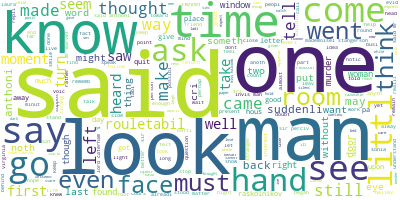

In [ ]:

df = get_prepared_data()
df.sample(frac=1)
bag = bag_of_words(df)
from wordcloud import WordCloud
String = ','.join(list(df["clean_text"].values))
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')
wordcloud.generate(String)
wordcloud.to_image()


In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def LDA(CleanData ,num_topics):
  data = CleanData.clean_text.values.tolist()
  data_words = list(sent_to_words(data))
  id2word = corpora.Dictionary(data_words)
  texts = data_words
  corpus = [id2word.doc2bow(text) for text in texts]
  from pprint import pprint
  # Build LDA model
  lda_model = gensim.models.LdaMulticore(corpus=corpus,id2word=id2word,num_topics=num_topics)
  # Print the Keyword in the number of topics 
  print(lda_model.print_topics())
  doc_lda = lda_model[corpus]
  #pyLDAvis.enable_notebook()
  #vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
  #pyLDAvis.display(vis)
  
  




In [ ]:
data = get_prepared_data()
lda = LDA(data,5)

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

[(0, '0.013*"said" + 0.008*"man" + 0.006*"one" + 0.006*"know" + 0.006*"would" + 0.006*"time" + 0.006*"look" + 0.005*"mr" + 0.005*"room" + 0.005*"go"'), (1, '0.013*"said" + 0.007*"one" + 0.007*"mr" + 0.005*"like" + 0.005*"could" + 0.005*"would" + 0.005*"go" + 0.004*"door" + 0.004*"littl" + 0.004*"man"'), (2, '0.018*"said" + 0.007*"mr" + 0.007*"man" + 0.006*"one" + 0.006*"know" + 0.005*"anthoni" + 0.005*"look" + 0.004*"see" + 0.004*"time" + 0.004*"think"'), (3, '0.011*"said" + 0.008*"one" + 0.007*"man" + 0.006*"anthoni" + 0.006*"look" + 0.005*"mr" + 0.005*"room" + 0.004*"know" + 0.004*"go" + 0.004*"hand"'), (4, '0.011*"said" + 0.006*"could" + 0.005*"one" + 0.005*"would" + 0.005*"man" + 0.005*"know" + 0.005*"door" + 0.005*"went" + 0.005*"monsieur" + 0.004*"room"')]


/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

# Modeling

In [9]:
from sklearn.decomposition import TruncatedSVD

### K-means Clustering

In [17]:
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans , KMeans
from sklearn.decomposition import PCA
import numpy as np

In [18]:
def kmeans_fit(data,clusters):
  return KMeans(n_clusters = clusters, init = 'k-means++').fit(data)

In [19]:
def kmeans_elbow_method(step,max_clusters,data):
  iters = range(2,max_clusters+1,step)
  errors = {'elbow':[],'model':[]}
  for i in iters:
    model = kmeans_fit(data,i)
    errors['elbow'].append(model.inertia_)
    errors['model'].append(model)
  return errors

In [20]:
def elbow_plot(step,max_clusters,clusters_error):
  iters = range(2,max_clusters+1,step)
  f, ax = plt.subplots(1, 1)
  ax.plot(iters, clusters_error, marker='o')
  ax.set_xlabel('Cluster Centers')
  ax.set_xticks(iters)
  ax.set_xticklabels(iters)
  ax.set_ylabel('SSE')
  ax.set_title('SSE by Cluster Center Plot')

In [21]:
def pca_transformation(dimensions,data):
  pca = PCA(dimensions)
  return pca.fit_transform(data)

In [40]:
def plot_clusters(data,model):
  lables = model.fit_predict(data)
  plt.figure(figsize=(10,10))
  plt_lables = np.unique(lables)
  for i in plt_lables:
    plt.scatter(data[lables == i,0],data[lables == i,1],label = i)  
  plt.xlabel([])
  plt.xlabel('PC1')
  plt.ylabel('PC2')
  plt.legend()
  plt.show()

Try kmeans

### Hierarical clustering 

In [10]:
from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn.cluster import AgglomerativeClustering

In [11]:
def hierarical_clustering_dendrogram(data,type,title):
  model = linkage(data,method = type)
  dendrogram(model, leaf_rotation = 90, leaf_font_size = 6)
  plt.title(title)
  plt.show()

In [12]:
def hierarical_clustering(data,clusters,type):
  cluster = AgglomerativeClustering(n_clusters=clusters,linkage=type)
  return cluster

try hierarical clustering

### Gausian Mixture

In [23]:
from sklearn.mixture import GaussianMixture

In [24]:
def Gaussian_mixture(data,components):
  return GaussianMixture(n_components=components).fit(data)

In [25]:
def gm_components_error(step,max_clusters,data):
  iters = range(2,max_clusters+1,step)
  errors = {'model':[],'bic':[],'aic':[]}
  for i in iters:
    model = Gaussian_mixture(data,i)
    errors['bic'].append(model.bic(data))
    errors['aic'].append(model.aic(data))
    errors['model'].append(model)
  return errors

In [26]:
def plot_gm_components_error(step,max_components,aic,bic,title):
  iters = range(2,max_components+1,step)
  plt.plot(iters, bic, label='BIC')
  plt.plot(iters, aic, label='AIC')
  plt.legend(loc='best')
  plt.xlabel('n_components')
  plt.title(title)
  plt.show()

# Perform Evaluations

In [27]:
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import silhouette_score

In [28]:
def rename_classes(actual, pred):
  new_pred = pred.copy()
  classes = list(set(actual))
  not_exsist_class = max(max(actual), max(pred)) + 1
  old_labels = []
  not_exist_class = max(max(pred), max(actual)) + 1
  for actual_class in classes:
      actual_indexes = [i for i, x in enumerate(actual) if x == actual_class]
      pred_values = [x for i, x in enumerate(pred) if i in actual_indexes]
      most_frequanted_value = max(set(pred_values), key = pred_values.count)

      if most_frequanted_value not in old_labels:
        old_labels.append(most_frequanted_value)
      else:
        old_labels.append(not_exsist_class)
        not_exsist_class += 1
  for i, old in enumerate(old_labels):
    if old > max(max(actual), max(pred)):
      act = 0
      for c in classes:
        if c not in list(set(pred)):
          act = c
          break
      old_labels[i] = act
  for act, old in enumerate(old_labels):
    for i in [i for i, x in enumerate(pred) if x == old]:
      new_pred[i] = act + 1

  return new_pred

In [29]:
def perform_evaluation(cluster, X, y, kappa=True, coherence=True, silhouette=True,pre = True):
    y = list(y)
    if pre:
      y_pred =cluster.predict(X)
    else:
      y_pred = cluster.fit_predict(X) 
    y_pred = rename_classes(y, y_pred)
    results = {} 
    if kappa:
      results["kappa"] = cohen_kappa_score(y, y_pred)
      #print("Kappa score = ", results["kappa"])
    # if coherence:
    #   results["Coherence"] = cluster.inertia_
    #   print("Coherence = ", results["Coherence"])
    if silhouette:
      results["silhouette"] = silhouette_score(X, y_pred)
      #print("Silhouette score = ",  results["silhouette"])
      
    return results
      

In [30]:
def error_analysis_plot(title,ylable,error,range):
  plt.plot(range,error)
  plt.xticks(range)
  plt.xlabel("Number of Clusters")
  plt.ylabel(ylable)
  plt.title(title)
  plt.show()

# Experiments

In [38]:
df = get_prepared_data()
transformations = [bag_of_words, tf_idf]
clf = TruncatedSVD(100)
trans = ['Bag of words','Tf-Idf']

In [39]:
n_clusters = 5
pca_n = 2

# Hierarical Clustering Experiments

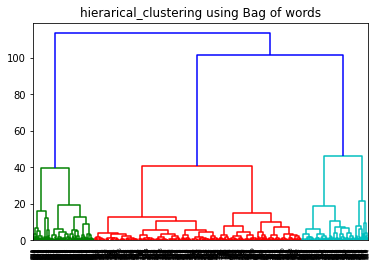

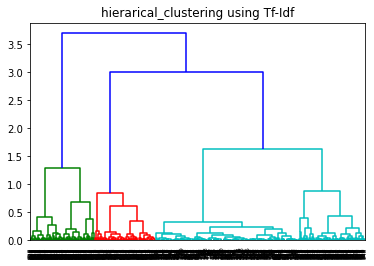

In [34]:
for counter ,transformation in enumerate(transformations):
  transformer = transformation(df['clean_text'])
  data = transformer.transform(df['clean_text'])
  data = clf.fit_transform(data)
  data = pca_transformation(pca_n,data)
  hierarical_clustering_dendrogram(data,'ward',"hierarical_clustering using "+trans[counter])

Hierarical clustering Evaluation

In [ ]:
for counter ,transformation in enumerate(transformations):
  transformer = transformation(df['clean_text'])
  data = transformer.transform(df['clean_text'])
  data = clf.fit_transform(data)
  data = pca_transformation(pca_n,data)
  model = hierarical_clustering(data,n_clusters,'single')
  err = perform_evaluation(model,data,df['book_id'],pre=False)
  print(trans[counter])
  print("Kappa score: "+str(err['kappa']))
  print("Silhouette score: "+str(err['silhouette']))

Bag of words
Kappa score: -2.220446049250313e-16
Silhouette score: 0.7112439090448084
Tf-Idf
Kappa score: 0.003750000000000031
Silhouette score: 0.6114334835936692


#GM clustering Evaluation

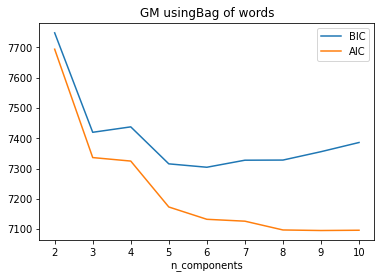

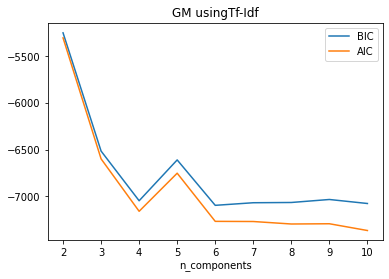

In [ ]:
errors = []
for counter ,transformation in enumerate(transformations):
  transformer = transformation(df['clean_text'])
  data = transformer.transform(df['clean_text'])
  data = clf.fit_transform(data)
  data = pca_transformation(pca_n,data)
  error = gm_components_error(1, 10,data)
  aic = error['aic']
  bic = error['bic']
  errors.append(error)
  plot_gm_components_error(1, 10,aic,bic,"GM using"+trans[counter])

In [ ]:
for index , error in enumerate(errors):
  transformer = transformations[index](df['clean_text'])
  data = transformer.transform(df['clean_text'])
  data = clf.fit_transform(data)
  data = pca_transformation(pca_n,data)
  model = Gaussian_mixture(data,n_clusters)
  err = perform_evaluation(model,data,df['book_id'])
  silhouette = err['silhouette']
  kappa = err['kappa']
  print(trans[index])
  print("Kappa score: "+str(err['kappa']))
  print("Silhouette score: "+str(err['silhouette']))

Bag of words
Kappa score: 0.32999999999999996
Silhouette score: 0.5034475104920796
Tf-Idf
Kappa score: 0.42000000000000004
Silhouette score: 0.44737985441898204


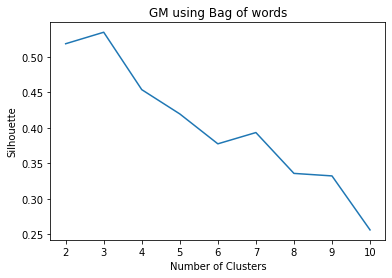

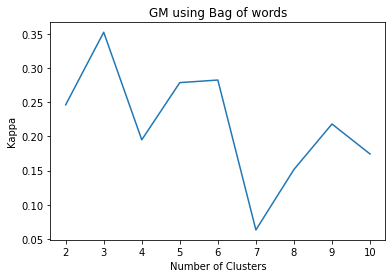

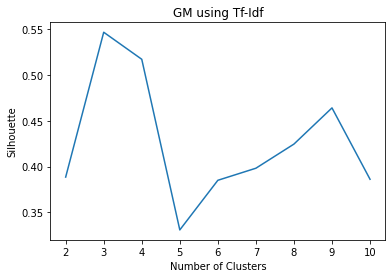

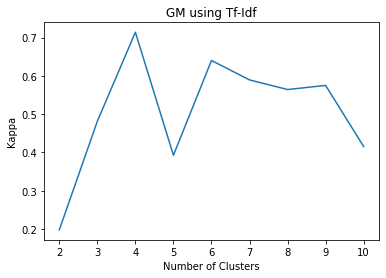

In [ ]:
for index , error in enumerate(errors):
  silhouette = [] 
  kappa = []
  transformer = transformations[index](df['clean_text'])
  data = transformer.transform(df['clean_text'])
  data = clf.fit_transform(data)
  data = pca_transformation(pca_n,data)
  for m in error['model']:
    err = perform_evaluation(m,data,df['book_id'])
    silhouette.append(err['silhouette'])
    kappa.append(err['kappa'])
  error_analysis_plot("GM using "+trans[index],"Silhouette",silhouette,range(2, 11))
  error_analysis_plot("GM using "+trans[index],"Kappa",kappa,range(2, 11))


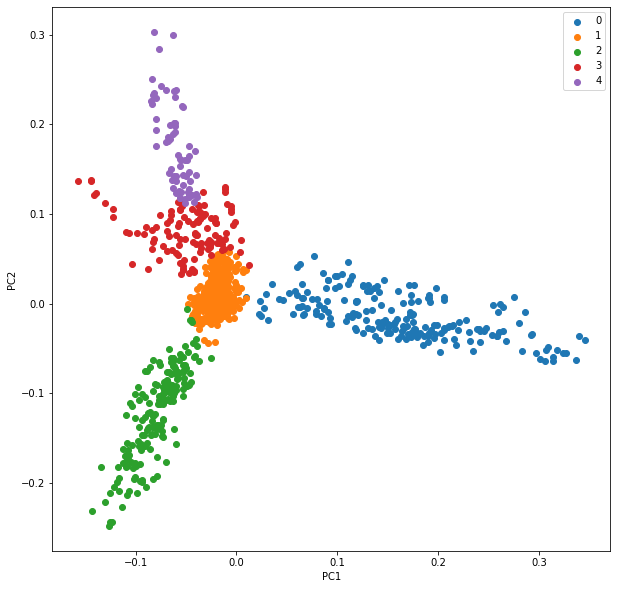

In [41]:
transformer = transformation(df['clean_text'])
data = transformer.transform(df['clean_text'])
data = clf.fit_transform(data)
data = pca_transformation(pca_n,data)
model = Gaussian_mixture(data,5)
plot_clusters(data,model)

# K-means Clustering Experments

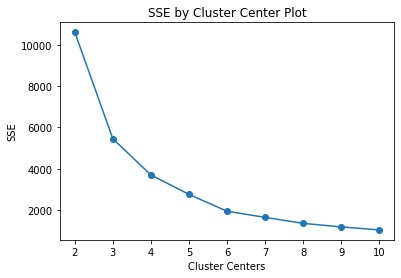

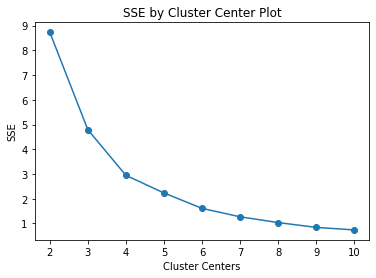

In [ ]:
errors = []
for transformation in transformations:
  transformer = transformation(df['clean_text'])
  data = transformer.transform(df['clean_text'])
  data = clf.fit_transform(data)
  data = pca_transformation(pca_n,data)
  err = kmeans_elbow_method(1, 10,data)
  errors.append(err)
  elbow_plot(1, 10,err['elbow'])

In [ ]:
for index , error in enumerate(errors):
  transformer = transformations[index](df['clean_text'])
  data = transformer.transform(df['clean_text'])
  data = clf.fit_transform(data)
  data = pca_transformation(pca_n,data)
  model = kmeans_fit(data,n_clusters)
  err = perform_evaluation(model,data,df['book_id'])
  silhouette = err['silhouette']
  kappa= err['kappa']
  print(trans[index])
  print("Kappa score: "+str(err['kappa']))
  print("Silhouette score: "+str(err['silhouette']))

Bag of words
Kappa score: 0.28374999999999995
Silhouette score: 0.5383161084071294
Tf-Idf
Kappa score: 0.58125
Silhouette score: 0.5853257907510138


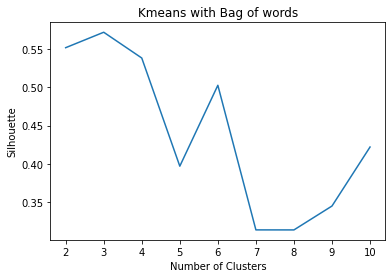

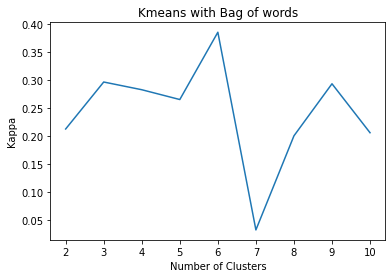

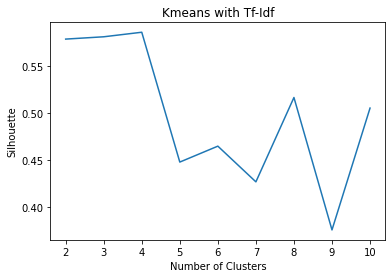

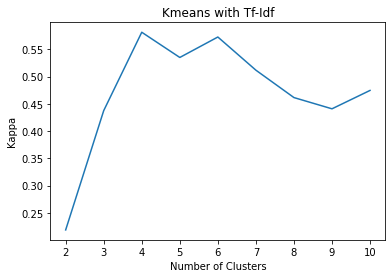

In [ ]:
for index , error in enumerate(errors):
  silhouette = []
  kappa = []
  transformer = transformations[index](df['clean_text'])
  data = transformer.transform(df['clean_text'])
  data = clf.fit_transform(data)
  data = pca_transformation(pca_n,data)
  for m in error['model']:
    err = perform_evaluation(m,data,df['book_id'])
    silhouette.append(err['silhouette'])
    kappa.append(err['kappa'])
  error_analysis_plot("Kmeans with "+trans[index],"Silhouette",silhouette,range(2, 11))
  error_analysis_plot("Kmeans with "+trans[index],"Kappa",kappa,range(2, 11))


# Error analysis

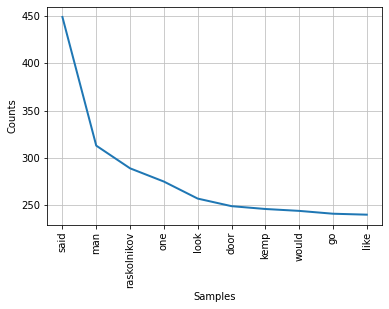

In [37]:
df = get_prepared_data()
transformer = tf_idf(df['clean_text'])
data = transformer.transform(df['clean_text'])
data = clf.fit_transform(data)
data = pca_transformation(pca_n,data)
model = Gaussian_mixture(data, 5)
y_pred = model.predict(data)
y = list(df["book_id"])
y_pred = rename_classes(y, y_pred)
wrong_samples = []
for i in range(len(y)):
  if y[i] != y_pred[i]:
     wrong_samples.append(df["clean_text"][i])

number_of_words_to_plot = 10
words = ""
for sample in wrong_samples:
    words += " " + sample

fd = nltk.FreqDist(words.split(" "))
fd.plot(number_of_words_to_plot, cumulative=False)